# Introduction to Deep Learning Course

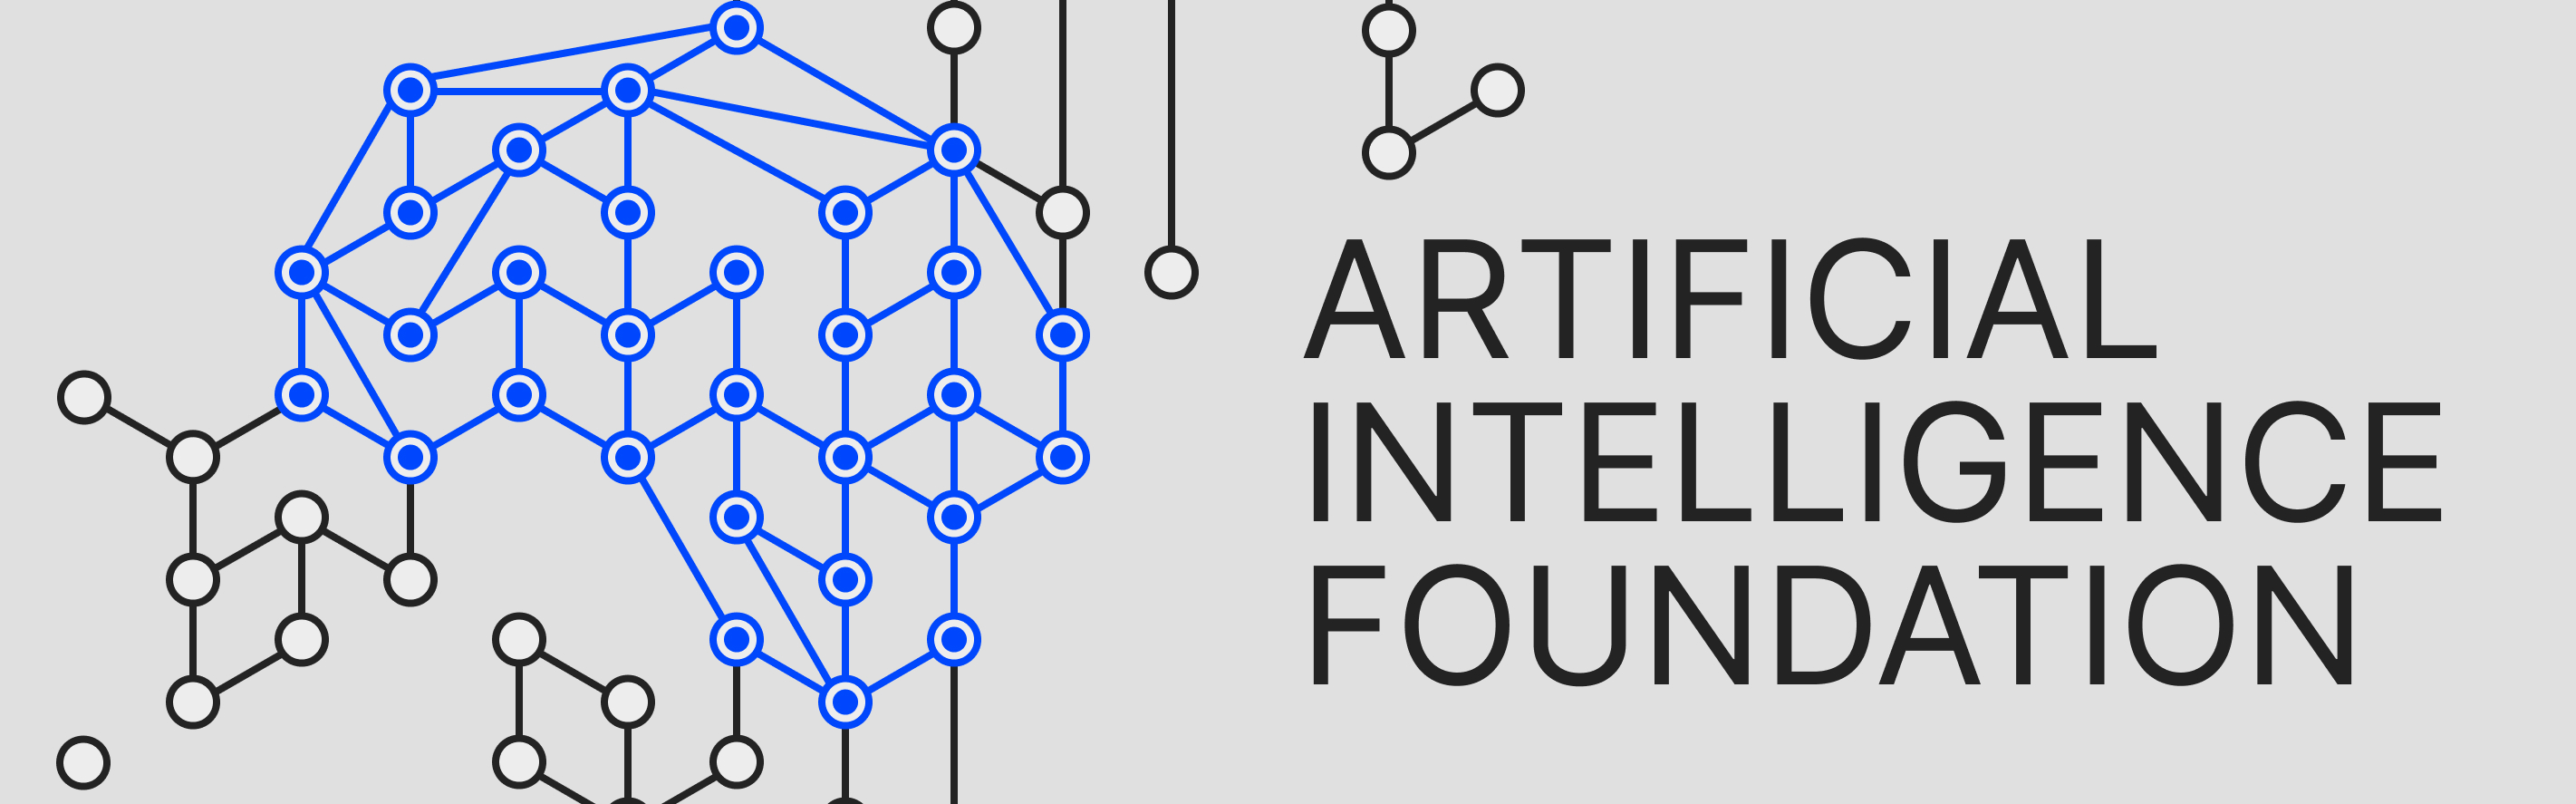

## Lesson #2, part 2. How backpropagation works

##### Author: [Tatiana Gaintseva](https://www.linkedin.com/in/tgaintseva/)

In the part 1 of the second lesson we have understood that the training of the neural network is done via gradient descent algorithm. We also understood that the core part of this algorithm is calculation of derivatives of a loss function with respect to network's parameters: $\frac{\partial L}{\partial w_{ij}}, \frac{\partial L}{\partial b_{ij}}$.

In this notebook we'll dive into the essense of the backpropagation algorithm, i.e. how exactly these gradients are calculated. We'll understand why exactly this algorithm of gradient updates in neural networks is called "backpropagation", and how is that that PyTorch performes this algorithm automatically during training of neural network without any need for us to calculate gradients or update weights manually.

Here's the **outline of this part**:

- [Reminder of gradient descent algorithm](https://colab.research.google.com/drive/1UU07poG70ZJCj38mYFOZV5YpTLa-k0MQ#scrollTo=mHHsYRUMh4lQ&line=1&uniqifier=1)
- [Backpropagation algorithm](https://colab.research.google.com/drive/1UU07poG70ZJCj38mYFOZV5YpTLa-k0MQ#scrollTo=dx_YVTTCh8ZR&line=1&uniqifier=1)
- [Backprogagation during training](https://colab.research.google.com/drive/1UU07poG70ZJCj38mYFOZV5YpTLa-k0MQ#scrollTo=_E4bLqSXTqoC&line=1&uniqifier=1)
- [Backpropagation for mathematical function](https://colab.research.google.com/drive/1UU07poG70ZJCj38mYFOZV5YpTLa-k0MQ#scrollTo=vjvFvmi8EwVy&line=1&uniqifier=1)

## Reminder of gradient descent algorithm

Let's quickly remind ourselves about how gradient descent algorithm works.

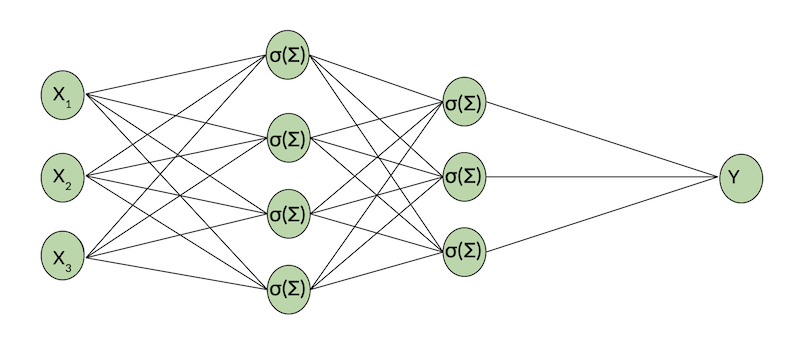

$$\widehat{y} = \sigma(W_3^T \sigma(W_2^T \sigma(W_1^TX + b_1 ) + b_{2}) + b_{3})$$

$$L = \frac{\sum_{i=1}^n loss(y_i, \sigma(W_3 \sigma(W_3^T \sigma(W_1^TX_i + b_1 ) + b_{2}) + b_{3}))}{n} \to min$$

**The gradient optimization algorithm for a neural network** looks like this:

- 1. Initialize all network weights $W_i$ and $b_i$ with random values. Choose the gradient descent step value $\alpha$.
- 2. Until the stopping criterion is met, do the following:
    - 2.1 calculate the $loss$ value with the current values of parameters $W_i$ and $b_i$;
    - 2.2 calculate the values of partial derivatives $\frac{\partial L}{\partial W_i}$, $\frac{\partial L}{\partial b_i}$;
    - 2.3 update the values of network parameters:
    $$W_i = W_i - \alpha \frac{\partial L}{\partial W_i}, \ \ b_i = b_i - \alpha \frac{\partial loss}{\partial b_i}$$

We will now talk about 2.2: calculating the values of partial derivatives $\frac{\partial L}{\partial W_i}$, $\frac{\partial L}{\partial b_i}$. We understand that the neural network and $L$ are just functions of many variables of the network's weights, so these derivatives can be calculated using standard rules of derivatives' calculation. But we'll now look at how exactly this is done in the case of neural networks and see why that is important.

## Backpropagation algorithm

Let's first remember that all the operations in the forward pass in neural networks are done in a matrix form, e.g. $WX+b$ is a matrix multiplication and summation. So, as we actually mentioned in the first part of this lesson, calculation of all the gradients is also done in a matrix form. But, as we also mentioned, matrix derivatives and their calculations are not fundamentaly different from standard scalar derivatives. If $W_k$ is a matrix of shape $n \times m$ with elements $w_{k}^{ij}, 1 \leqslant i \leqslant n, 1 \leqslant j \leqslant m$, then $\frac{\partial L}{\partial W_i}$ is a matrix of the same size $n \times m$ with elements $\frac{\partial\ L}{\partial w_{k}^{ij}}$:

$$\frac{\partial\ L}{\partial W_i} =
\begin{pmatrix}
\frac{\partial L}{\partial w_i^{11}} & \frac{\partial L}{\partial w_i^{12}} & \dots & \frac{\partial L}{\partial w_i^{1l}}\\
\frac{\partial L}{\partial w_i^{21}} & \frac{\partial L}{\partial w_i^{22}} & \dots & \frac{\partial L}{\partial w_i^{2l}} \\
\dots & \dots & \dots & \dots\\
\frac{\partial L}{\partial w_i^{m1}} & \frac{\partial L}{\partial w_i^{m2}} & \dots & \frac{\partial L}{\partial w_i^{ml}} \\
\end{pmatrix}$$

The same for $b_i$:

$$\frac{\partial L}{\partial b_i} =
\begin{pmatrix}
\frac{\partial L}{\partial b_i^{1}} & \frac{\partial L}{\partial b_i^{2}} & \dots & \frac{\partial L}{\partial b_i^{m}}\\
\end{pmatrix}$$

There are standard rules for calculating matrix derivetives in a matrix form just as for the scalar derivatives. You can read more about it [here](https://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf)

Okay, let's now assume we believe we can calculate metrix derivatives of complicated functions of a matrix form. Let's now look at some neural network. Let's say we have a 3-layer fully-connected neural network which outputs $p$ as output, and we a loss function $loss$.

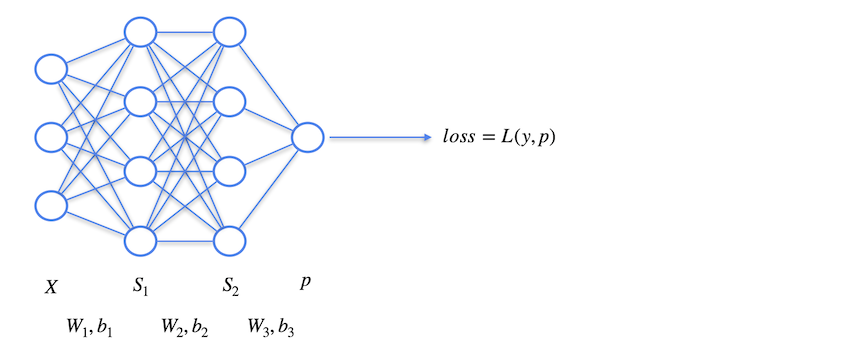

Note that $L$ is a function of $y$ and $p$, and at this point we can easily calculate $\frac{\partial L}{\partial p}$. For example, if $loss$ is MSE, then $L(y, p) = (p-y)^2$, and $\frac{\partial L}{\partial p} = 2(p-y)$. Knowing values of $p$ and $y$ after forward pass, we can get numerical value of this derivative.

Let's visualize it as follows:

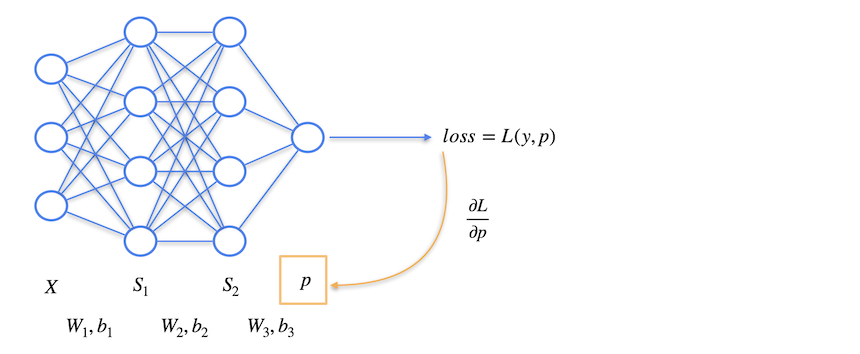

Alright, now we keep in mind that we have $\frac{\partial L}{\partial p}$.

Next, we have $p = \sigma(S_2W_3+b_3)$. We can calculate $\frac{\partial p}{\partial W_3}$ and $\frac{\partial p}{\partial b_3}$. If we set $\widehat{p} = S_2W_3+b_3$, then by chain rule:

$$\frac{\partial p}{\partial W_3} = \frac{\partial p}{\partial \widehat{p}}\frac{\partial \widehat{p}}{\partial W_3}$$
$$\frac{\partial p}{\partial b_3} = \frac{\partial p}{\partial \widehat{p}}\frac{\partial \widehat{p}}{\partial b_3}$$

All the derivatives that we have here are matrix derivatives of quite simple functions, e.g. $\frac{\partial p}{\partial \widehat{p}}$ is a derivative of sigmoid function, and $\frac{\partial \widehat{p}}{\partial W_3}$ and $\frac{\partial \widehat{p}}{\partial b_3}$ are derivatives of a linear matrix function. And again, knowing current values of $S_2$, $\widehat{S_2}$, $W_3$ and $b_3$, we can get a numerical value of the derivative.

Let's add this to our illustration:

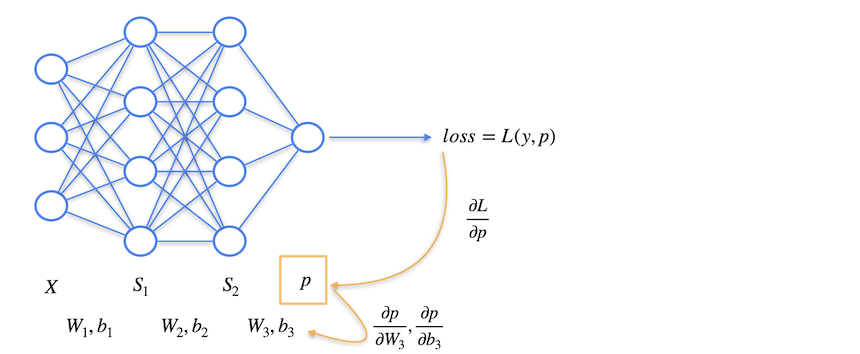

Now we can calculate $\frac{\partial L}{\partial W_3}$ and $\frac{\partial L}{\partial b_3}$ by combining $\frac{\partial L}{\partial p}$ and $\frac{\partial p}{\partial W_3}$,  $\frac{\partial p}{\partial b_3}$ using chain rule:

$$\frac{\partial L}{\partial W_3} = \frac{\partial L}{\partial p}\frac{\partial p}{\partial W_3}$$

$$\frac{\partial L}{\partial b_3} = \frac{\partial L}{\partial p}\frac{\partial p}{\partial b_3}$$

Let's visualize it by drawing an arrow from $L$ to $W_3$ and $b_3$, meaning we now have gotten as far as to $W_3$ and $b_3$ with our derivatives' calculations:

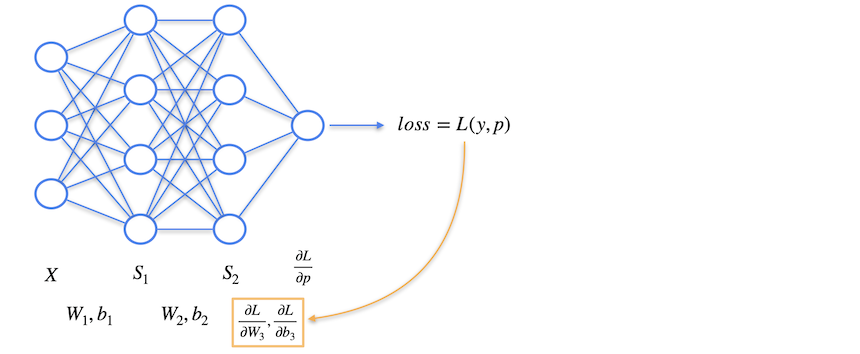

Next, note that at this point we can also get $\frac{\partial L}{\partial S_2}$. Indeed, from $p = \sigma(S_2W_3+b_3)$ we can get $\frac{\partial p}{\partial S_2}$, and combining it with $\frac{\partial L}{\partial p}$, we get

$$\frac{\partial L}{\partial S_2} = \frac{\partial L}{\partial p}\frac{\partial p}{\partial S_2}$$

So now we have:

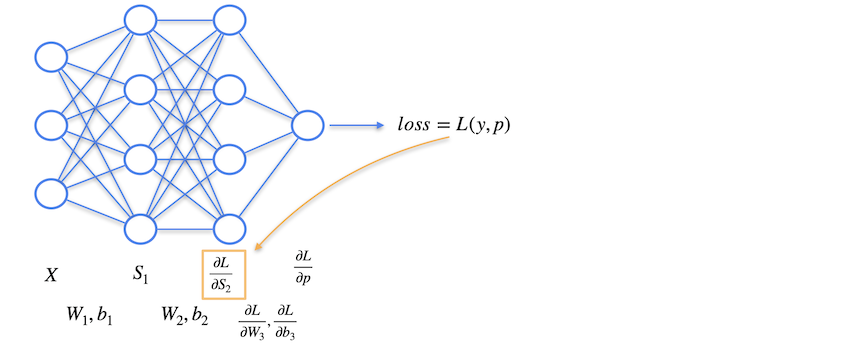

Next, we move to the previous layer, which has parameters $W_2, b_2$. We have $S_2 = \sigma(S_1W_2+b_2)$, so if we set $\widehat{S_2} = S_1W_2+b_2$, we can calculate the following derivatives:

$$\frac{\partial S_2}{\partial W_2} = \frac{\partial S_2}{\partial \widehat{S_2}}\frac{\partial \widehat{S_2}}{\partial W_2}$$
$$\frac{\partial S_2}{\partial b_2} = \frac{\partial S_2}{\partial \widehat{S_2}}\frac{\partial \widehat{S_2}}{\partial b_2}$$
$$\frac{\partial S_2}{\partial S_1} = \frac{\partial S_2}{\partial \widehat{S_2}}\frac{\partial \widehat{S_2}}{\partial S_1}$$

So now we have:

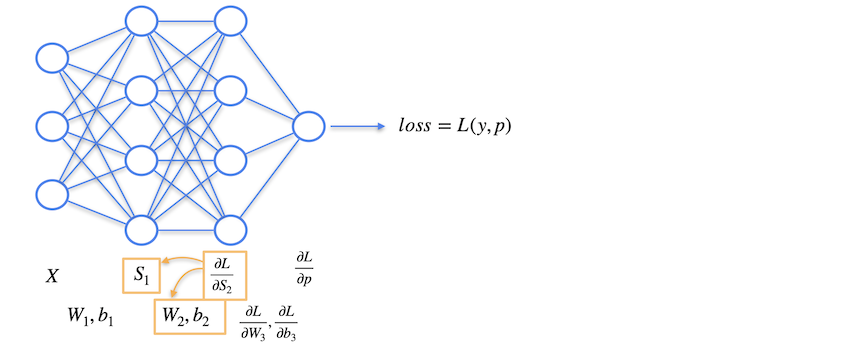

Alright. Next step — combining previously calculated $\frac{\partial L}{\partial S_2}$ with newly calculated $\frac{\partial S_2}{\partial W_2}$, $\frac{\partial S_2}{\partial b_2}$ and $\frac{\partial S_2}{\partial S_1}$, getting:

$$\frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial S_2}\frac{\partial S_2}{\partial W_1}$$
$$\frac{\partial L}{\partial b_2} = \frac{\partial L}{\partial S_2}\frac{\partial S_2}{\partial b_1}$$
$$\frac{\partial L}{\partial S_1} = \frac{\partial L}{\partial S_2}\frac{\partial S_2}{\partial S_1}$$

So we have this:

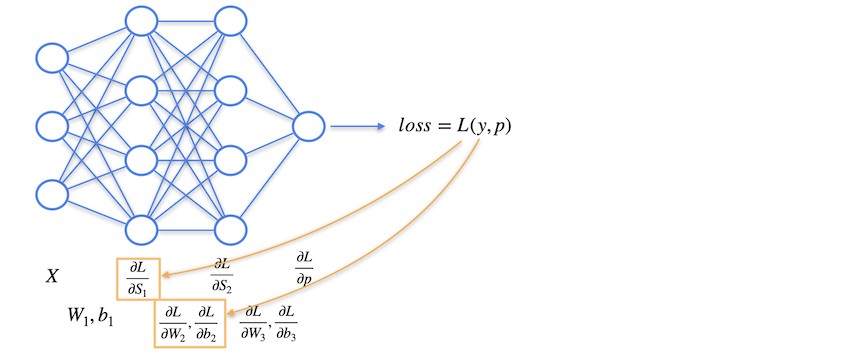

And now we have derivatives of the loss function $L$ with respect to the parameters $W_2, b_2$ and input $S_1$ of the pre-last layer. We now can move further back through the network, calculating derivatives $\frac{\partial L}{\partial W_1}$, $\frac{\partial L}{\partial b_1}$ and $\frac{\partial L}{\partial X}$. We can do that in the same way as we did for $\frac{\partial L}{\partial W_2}$, $\frac{\partial L}{\partial b_2}$ and $\frac{\partial L}{\partial S_1}$, combining them using chain rule from $\frac{\partial L}{\partial S_1}$ and $\frac{\partial S_1}{\partial W_1}$, $\frac{\partial S_1}{\partial b_1}$, $\frac{\partial S_1}{\partial X}$.

If our network had more layers, we could continue this process, moving from the last layers of the network to the first ones, calculating gradinets for  layers from last to the first. Because of this consecutive last-to-first nature of this process, it is called **backpropagation**. We are propagating gradients from back to forward.

In general, suppose we have $i^{th}$ layer of the network which represents a function $S_i = \sigma(S_{i-1}W_i + b_i)$, and we already calculated derivative of a loss function with respect to its output $\frac{\partial L}{\partial S_i}$. Then, setting $\widehat{S_i} = S_{i-1}W_i + b_i$, we can calculate

$$\frac{\partial L}{\partial W_i} = \frac{\partial L}{\partial S_i}\frac{\partial S_i}{\partial \widehat{S_i}}\frac{\partial \widehat{S_i}}{\partial W_i}$$
$$\frac{\partial L}{\partial b_i} = \frac{\partial L}{\partial S_i}\frac{\partial S_i}{\partial \widehat{S_i}}\frac{\partial \widehat{S_i}}{\partial b_i}$$
$$\frac{\partial L}{\partial S_{i-1}} = \frac{\partial L}{\partial S_i}\frac{\partial S_i}{\partial \widehat{S_i}}\frac{\partial \widehat{S_i}}{\partial S_{i-1}}$$

Having saved values for $S_{i-1}, \widehat{S_{i}}, W_i, b_i$ from the forward pass, we can easily get numerical values of these derivatives.

And then we can do the same for the previous layer number ${i-1}$, and so on.

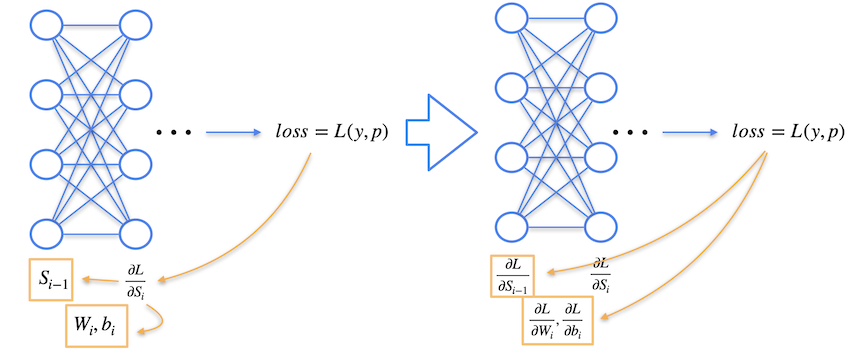

## Backprop during training

So now we can get an idea of what's going on inside PyTorch when we train a model:
- During forward pass, the computational graph is build. Computation graph is a oriented graph with vertices representing simple functions done inside the network, and edges show the information flow. For simplicity, you might imagine this graph as follows: its vertices are model's layers, and edge from layer $i$ to layer $j$ means that layer $j$ received output of layer $i$ as input. All the numerical results of intermediate operations are saved during forward pass, because they are needed for gradients calculations during backward pass
- When `model.backward()` is called, backpropagation is done. Each layer $i$ receives $\frac{\partial L}{\partial S_i}$ as input for its `backward()` method, calculates derivatives of $L$ with respect to its parameters $\frac{\partial L}{\partial W_i}$, $\frac{\partial L}{\partial b_i}$ and with respect to its input $\frac{\partial L}{\partial S_{i-1}}$, and sends $\frac{\partial L}{\partial S_{i-1}}$ further along edges of computational graph that lead to this layer. That is, this layer calculates its own gradients and sends gradients with respect to its input back to previous layers, so they can do the same.

So this is how this process inside one layer can be visualised:

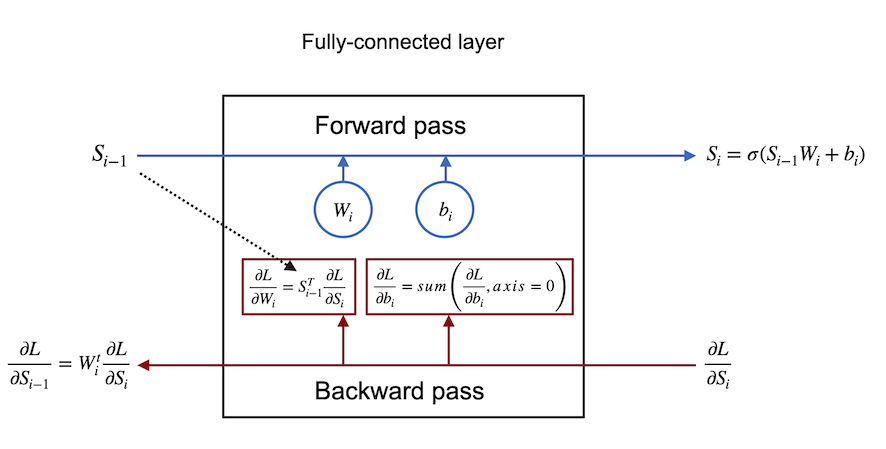

Note that it is important that the computational graph is build on each forward pass of the model from scratch. Consider, for example, a network with two brances which activate depending on input parameter:

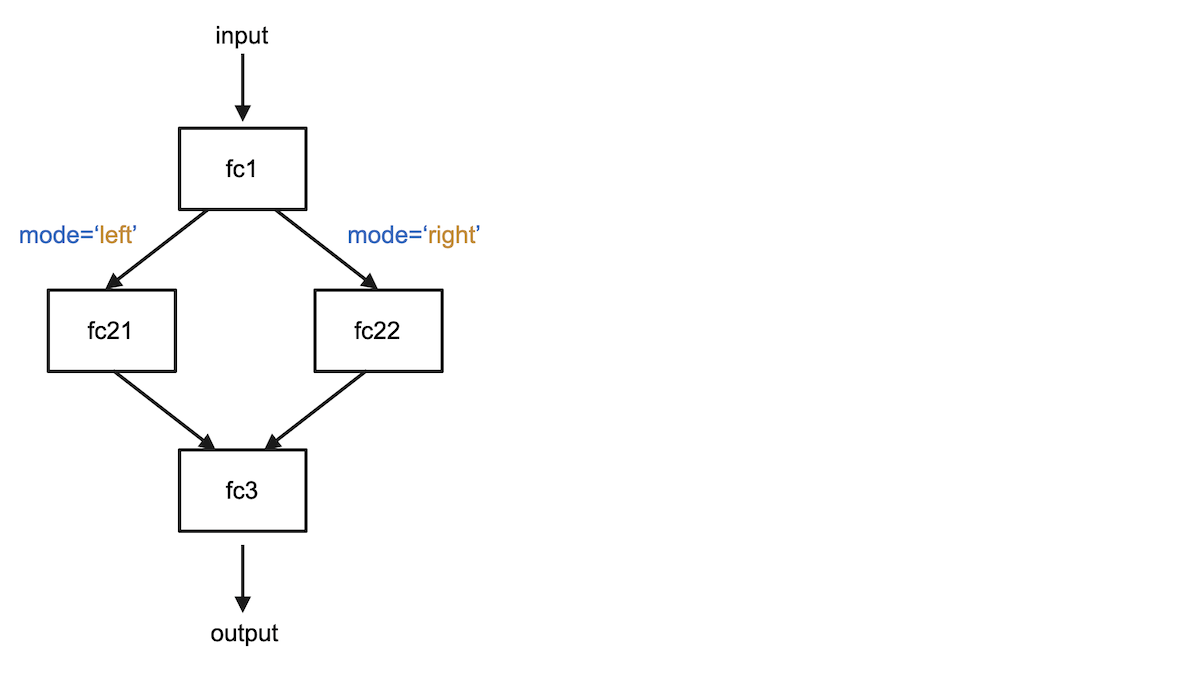

And the code for it:

In [ ]:
import torch
import torch.nn as nn

class Net(nn.Module):
    def __init__(self, dim):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(dim, 5)
        self.tanh1 = nn.Tanh()

        # two branches
        self.fc21 = nn.Linear(5, 5)
        self.tanh21 = nn.Tanh()

        self.fc22 = nn.Linear(5, 5)
        self.tanh22 = nn.Tanh()

        self.fc3 = nn.Linear(5, 1)
        self.tanh3 = nn.Tanh()


    def forward(self, x, mode='left'):

        x = self.fc1(x)
        x = self.tanh1(x)

        if mode == 'left':
            x = self.fc21(x)
            x = self.tanh21(x)
        elif mode == 'right':
            x = self.fc22(x)
            x = self.tanh22(x)

        x = self.fc3(x)
        x = self.tanh3(x)
        return x

In this case, if mode is 'left', then the gradients from fc3 should go to the fc21, and fc22 should not get updated. If mode is 'right' — vice versa. So, to be able to correctly backpropagate, we need to build computational graph during forward pass.

## Backpropagation for mathematical functions

It is worth mentioning that we normally calculate gradients of any complicated function using the same idea, by calculating gradients from back to forward.

Consider this function:

$$f(x) = ((x_1+3)\times(2x_2+x_2^2))^2$$

The computational graph can be visualised as follows:

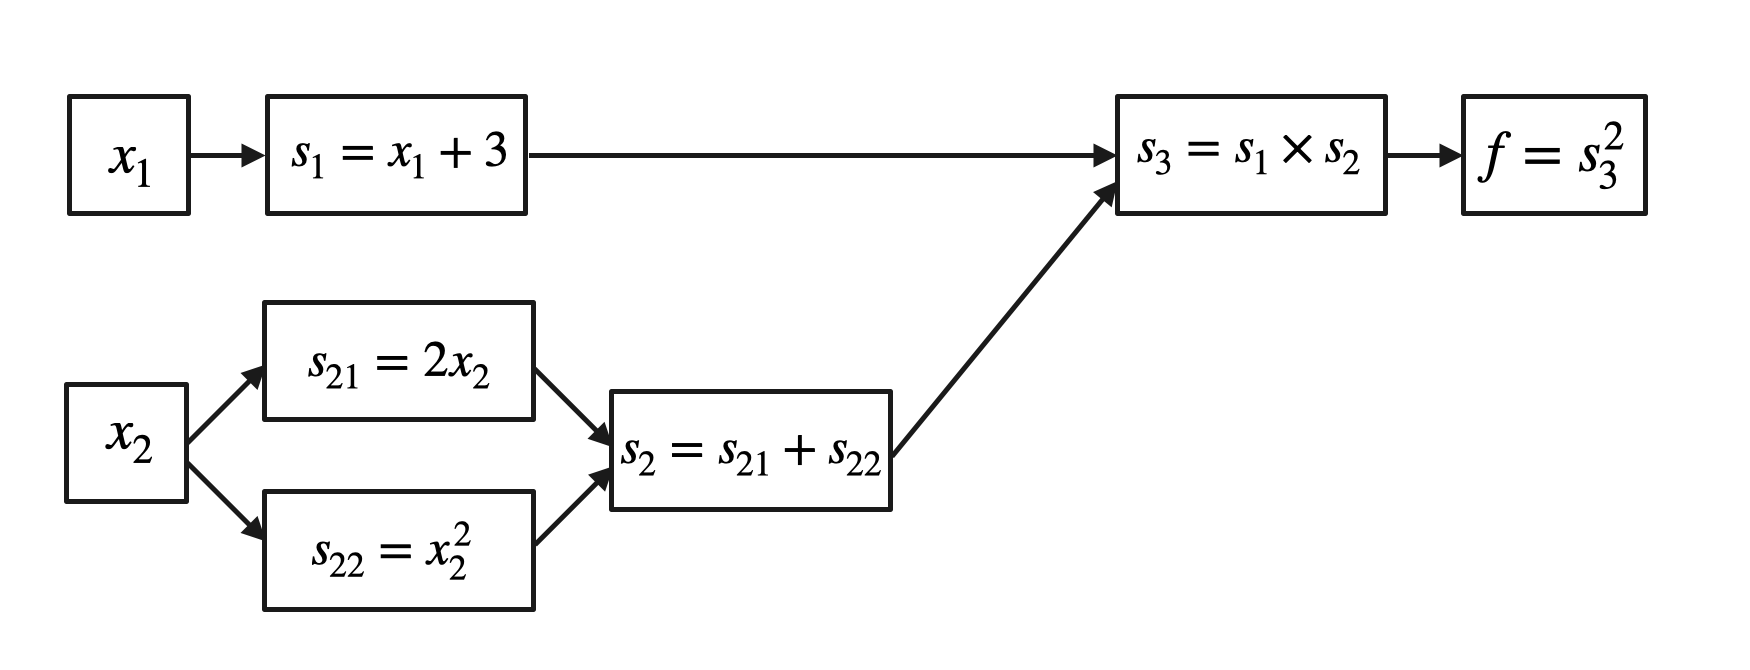

So based on a chain rule, we calculate gradients that way:

$\frac{\partial f}{\partial s_3} = 2s_3 = 2(x_1+3)(2x_2+x_2^2)$


$\frac{\partial s_3}{\partial s_1} = s_2 = (2x_2+x_2^2)$


$\frac{\partial s_3}{\partial s_2} = s_1 = x_1+3$


$\frac{\partial s_2}{\partial s_{21}} = 1$


$\frac{\partial s_2}{\partial s_{22}} = 1$


$\frac{\partial s_{21}}{\partial x_2} = 2$


$\frac{\partial s_{22}}{\partial x_2} = 2x_2$


$\frac{\partial s_{1}}{\partial x_1} = 1$





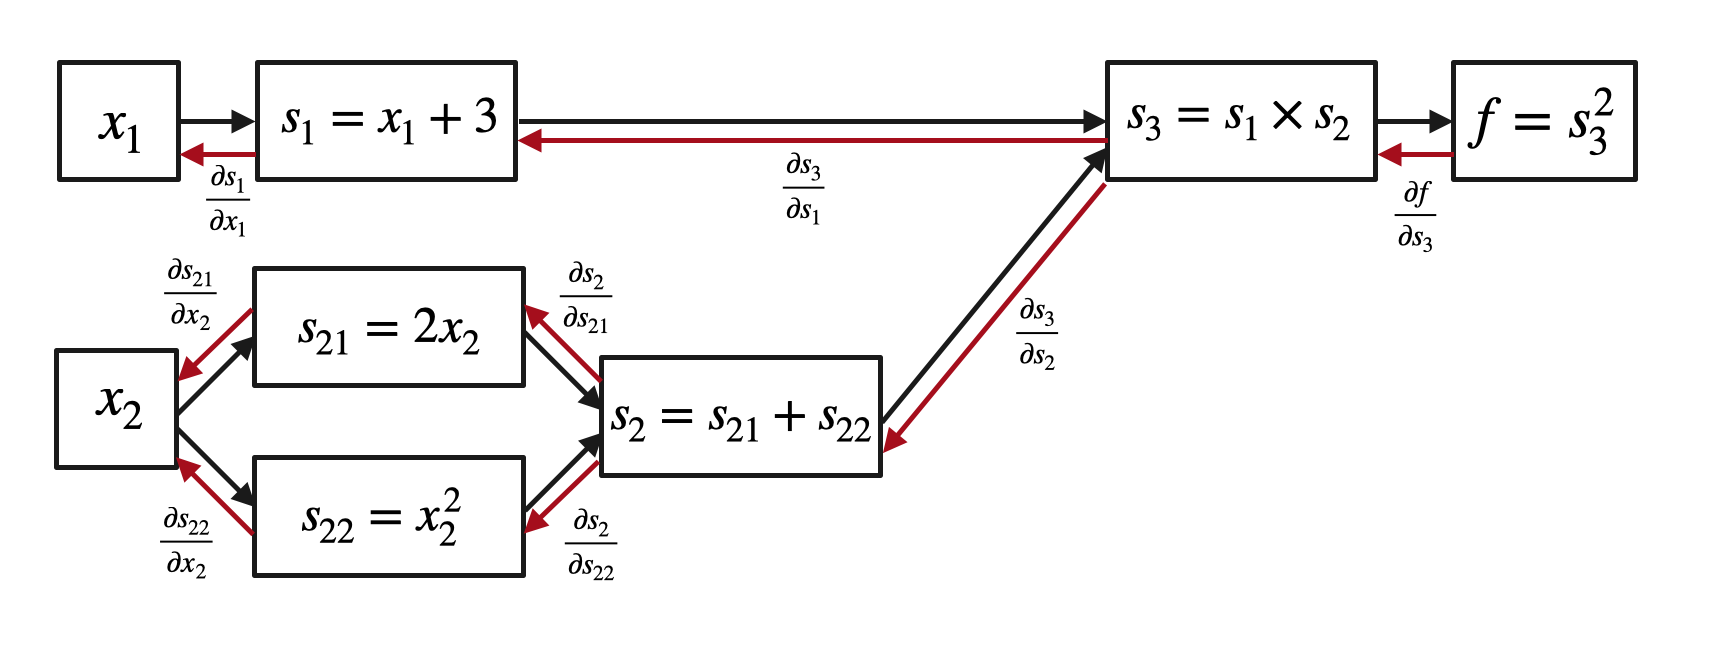


So we can compose:

$$\frac{\partial f}{\partial x_1} = \frac{\partial f}{\partial s_3}\frac{\partial s_3}{\partial s_1}\frac{\partial s_1}{\partial x_1} = 2(x_1+3)(2x_2+x_2^2)(2x_2+x_2^2)$$

$$\frac{\partial f}{\partial x_2} = \frac{\partial f}{\partial s_3}\frac{\partial s_3}{\partial s_2}\left(\frac{\partial s_{2}}{\partial s_{21}}\frac{\partial s_{21}}{\partial x_{2}} + \frac{\partial s_{2}}{\partial s_{22}}\frac{\partial s_{22}}{\partial x_{2}}\right) = 2(x_1+3)(2x_2+x_2^2)(x_1+3)(1+2x_2)$$